# EDA (Exploratory Data Analysis)

In [1]:
import re
import feather
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

/Users/kendra/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


Load data, take a subset for analysis

In [2]:
full_df = feather.read_dataframe('../data/processed/train_df.feather')

In [3]:
full_df.shape

(7449443, 27)

In [4]:
full_df['label'].value_counts(1)

benign      0.998858
phishing    0.001142
Name: label, dtype: float64

In [5]:
df = full_df.sample(frac=0.2).reset_index(drop=True)
df.shape

(1489889, 27)

Make sure proportion of labels is similar (it is)

In [6]:
df['label'].value_counts(1)

benign      0.998822
phishing    0.001178
Name: label, dtype: float64

In [7]:
df.head()

,url,label,subdomain,domain,suffix,hostname,path,query,subdomain_null_ind,subdomain_www_ind,length_url,length_domain,length_path,domain_dot_cnt,url_slash_cnt,path_dot_cnt,hostname_dash_cnt,url_digit_cnt,url_special_char_cnt,url_reserved_char_cnt,url_hex_pattern_ind,hostname_entropy,url_entropy,php_ind,abuse_ind,admin_ind,verification_ind
0,https://www.cervantes.com/autor/62976/rojas-fe...,benign,www,cervantes,com,www.cervantes.com,/autor/62976/rojas-fernando-de/,None,0,1,56,9,31,0,6,0,0,5,16,7,0,3.454822,4.382811,0,0,0,0
1,https://pittsburgh.cbslocal.com/video/4112560-...,benign,pittsburgh,cbslocal,com,pittsburgh.cbslocal.com,/video/4112560-pittsburgh-clo-presents-oklahoma/,None,0,0,79,8,48,0,5,0,0,7,19,6,0,3.795089,4.581564,0,0,0,0
2,https://www.cathyzielske.com/2015/03/project-p...,benign,www,cathyzielske,com,www.cathyzielske.com,/2015/03/project-pages-february/,None,0,1,60,12,32,0,6,0,0,6,17,7,0,3.784184,4.646078,0,0,0,0
3,http://www.centrolamilpa.com/2012/08/taller-de...,benign,www,centrolamilpa,com,www.centrolamilpa.com,/2012/08/taller-de-munecos-waldorf.html,None,0,1,67,13,39,0,5,1,0,6,18,6,0,3.594466,4.428050,0,0,0,0
4,http://www.cdsclw.com/news/2/,benign,www,cdsclw,com,www.cdsclw.com,/news/2/,None,0,1,29,6,8,0,5,0,0,1,9,6,0,2.753434,3.686458,0,0,0,0


In [8]:
good_df = df[df['label'] == 'benign']
bad_df = df[df['label'] == 'phishing']

In [9]:
len(good_df), len(bad_df)

(1488134, 1755)

# EDA

In [10]:
df.describe()

,subdomain_null_ind,subdomain_www_ind,length_url,length_domain,length_path,domain_dot_cnt,url_slash_cnt,path_dot_cnt,hostname_dash_cnt,url_digit_cnt,url_special_char_cnt,url_reserved_char_cnt,url_hex_pattern_ind,hostname_entropy,url_entropy,php_ind,abuse_ind,admin_ind,verification_ind
count,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06
mean,3.054691e-01,5.157901e-01,7.139125e+01,1.139801e+01,3.750560e+01,5.033932e-05,4.719334e+00,3.616256e-01,1.093645e-01,5.950214e+00,2.024791e+01,6.507102e+00,5.049101e-02,3.348493e+00,4.329294e+00,7.068647e-02,3.355955e-04,1.345738e-03,3.557312e-05
std,4.606060e-01,4.997508e-01,4.422804e+01,5.127855e+00,3.294055e+01,1.228884e-02,1.718639e+00,5.121989e-01,3.834544e-01,1.060483e+01,2.430875e+01,2.982789e+00,2.189559e-01,3.236379e-01,2.884887e-01,2.563005e-01,1.831620e-02,3.665962e-02,5.964216e-03
min,0.000000e+00,0.000000e+00,1.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,3.000000e+00,0.000000e+00,4.109923e-01,1.018754e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,4.600000e+01,8.000000e+00,1.600000e+01,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,5.000000e+00,0.000000e+00,3.155639e+00,4.138502e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.000000e+00,6.200000e+01,1.100000e+01,2.900000e+01,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.500000e+01,6.000000e+00,0.000000e+00,3.375000e+00,4.314772e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.000000e+00,8.500000e+01,1.500000e+01,5.000000e+01,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,8.000000e+00,2.300000e+01,7.000000e+00,0.000000e+00,3.576618e+00,4.512685e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,2.233000e+03,6.300000e+01,1.444000e+03,3.000000e+00,4.700000e+01,1.400000e+01,1.000000e+01,7.720000e+02,1.428000e+03,1.350000e+02,1.000000e+00,4.688499e+00,6.015820e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Correlation plot

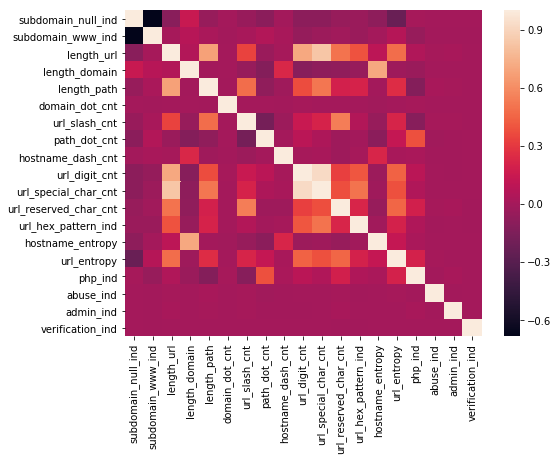

In [11]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr)

## Distros

Compare distribution of numerical features between "good" and "bad" labels:

In [24]:
def plot_hist_overlay(col, n_bins=20):
    val_min = df[col].min()
    val_max = df[col].max()
    
    bins = np.linspace(val_min, val_max, n_bins)
    plt.hist([good_df[col], bad_df[col]], bins, density=True, label=['good', 'bad'], alpha=0.5)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Fraction');

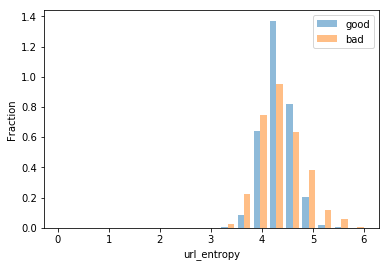

In [25]:
plot_hist_overlay('url_entropy')

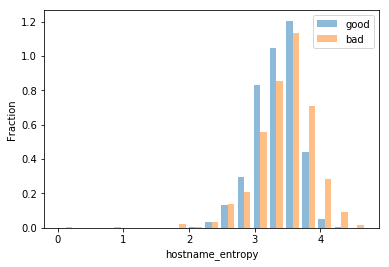

In [26]:
plot_hist_overlay('hostname_entropy')

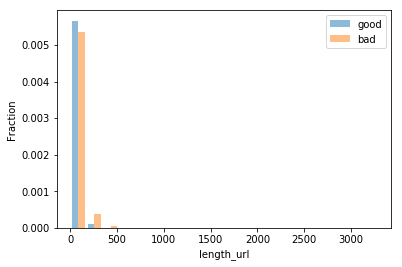

In [27]:
plot_hist_overlay('length_url')

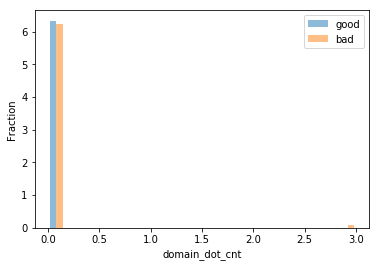

In [114]:
plot_hist_overlay('domain_dot_cnt')

In [115]:
good_df['domain_dot_cnt'].describe()

count    1488165.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: domain_dot_cnt, dtype: float64

In [116]:
bad_df['domain_dot_cnt'].describe()

count    1724.000000
mean        0.048724
std         0.379317
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: domain_dot_cnt, dtype: float64

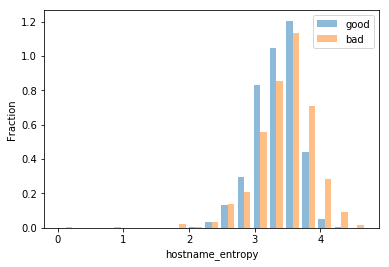

In [117]:
plot_hist_overlay('hostname_entropy')

## T-test

The independent t-test is used to determine whether there is a statistically significant difference between the means in two unrelated groups (i.e. different sizes and/or variances)

As an example:

In [30]:
stats.ttest_ind(good_df['length_url'], bad_df['length_url'])

Ttest_indResult(statistic=-4.36784739823145, pvalue=1.254855651051436e-05)

Perform on all numerical columns:

In [32]:
num_cols = df.select_dtypes(exclude=['object'])
non_cnt_cols = [col for col in num_cols if re.search('_ind', col) is None]

res_dict = {}
for col in non_cnt_cols:
    res_dict[col] = stats.ttest_ind(good_df[col], bad_df[col])    

res_df = pd.DataFrame(res_dict).T
res_df.columns=['t-statistic', 'p-val']

In [112]:
res_df.sort_values(by='p-val', ascending=False)

,t-statistic,p-val
url_entropy,-3.757208,1.718262e-04
length_url,-4.367847,1.254856e-05
length_domain,5.821820,5.822194e-09
length_path,6.282314,3.336629e-10
url_special_char_cnt,-9.512533,1.863369e-21
url_slash_cnt,-9.874366,5.385971e-23
url_reserved_char_cnt,-12.383939,3.205601e-35
hostname_entropy,-14.610979,2.409083e-48
path_dot_cnt,-15.255809,1.520024e-52
url_digit_cnt,-20.479707,3.364454e-93


## Chi-Squared

The chi-squared test statistic is used to determine if there is an assocation between two categorical variables.  

`chi2_contingency` computes chi-squared stastic and p-value for independence hypothesis test for a contingency table. A contingency table, or cross-tabulation, lists the observations by category. Guideline: observed & expected frequ > 5 (for all cells).

 

Refs:

- http://lagrange.univ-lyon1.fr/docs/scipy/0.17.1/generated/scipy.stats.chi2_contingency.html

- https://en.wikipedia.org/wiki/Contingency_table


In [38]:
from scipy.stats import chi2_contingency

In [40]:
bool_cols = [col for col in df.columns if re.search('_ind', col) is not None]

conting_cols = ['suffix', 'protocol'] + bool_cols

target = 'label'

chi2_dict = {}

for col in conting_cols:
    col1 = col
    col2 = target

    crosstab = pd.crosstab(df[col1], df[col2])
    chi_test = chi2_contingency(crosstab)
    chi2 = chi_test[0]
    n = crosstab.sum().sum()
    phi2 = chi2/n
    r,k = crosstab.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    V = np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
    chi2_dict[col] = [np.round(chi_test[0],0), chi_test[1], V]

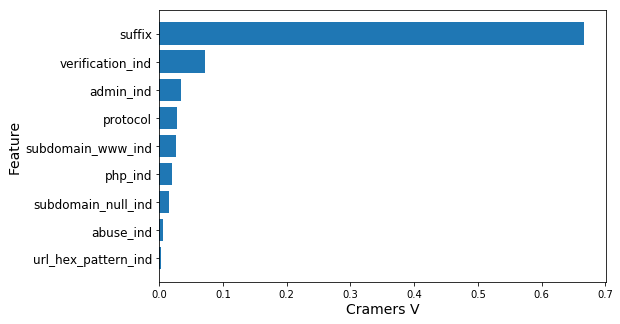

In [113]:
res_list = [[x[0], x[1][2]] for x in list(chi2_dict.items())]
res_list.sort(key=lambda x: x[-1])
ns = range(len(res_list))
labels = [x[0] for x in res_list]
data = [x[1] for x in res_list]

plt.figure(figsize=(8, 5))
plt.barh(ns, data)
plt.ylabel('Feature', fontsize=14)x
plt.yticks(ns, labels, fontsize=12)
plt.xlabel('Cramers V', fontsize=14);

### Investigate Suffix

In [48]:
col1 = 'suffix'
col2 = target

crosstab = pd.crosstab(df[col1], df[col2])
crosstab

label,benign,phishing
suffix,,
,0,29
COM,2,0
ac.id,0,5
ac.ke,0,1
ac.th,0,8
ae,0,1
ai,0,1
al,0,1
am,0,1


In [59]:
crosstab[100:]

label,benign,phishing
suffix,,
name,0,1
net,0,73
nl,0,2
nu,0,1
online,0,1
org,0,34
org.au,0,2
org.br,0,1
org.in,0,1


In [60]:
good_df['suffix'].value_counts(dropna=False)

com    1488163
COM          2
Name: suffix, dtype: int64

In [12]:
bad_df['suffix'].value_counts(1, dropna=False)[:10]

com       0.557265
net       0.050712
ru        0.035897
app       0.023362
com.br    0.015954
          0.014245
org       0.013675
com.au    0.012536
ly        0.011966
de        0.011396
Name: suffix, dtype: float64

It appears I have only pulled in '.com' URLs from the CommonCrawl.
- Which index files contain other TLD's?
- Is there an efficient way to pull a subset from each of the 300+ cc_index files?

Other #TODO:
- apply lower-case 
- expand .ly URLs

In [61]:
len(df[df['suffix'] == 'ly'])

20

In [65]:
ly_urls = df[df['suffix'] == 'ly']['url']
ly_urls

14836                             https://bit.ly/2MQKBAs
208559     https://bit.ly/2OJzKL6?facebook-terms-service
287099                             http://bit.ly/2QQYUZC
323251                            https://bit.ly/2sEIJob
349106                            https://bit.ly/34fyZyx
352250                            https://bit.ly/2ruvMfR
416696                            https://bit.ly/2Dco3G7
437620                           https://cutt.ly/7eKRCj8
572131     https://bit.ly/35KF2vk?facebook-terms-service
651738                            https://bit.ly/2IMaKzb
653935                          http://www.snip.ly/3kqwy
655869                           https://cutt.ly/SwdVcdy
708542                           https://cutt.ly/VeMeGSl
853901                           https://cutt.ly/KBCBank
861061                           https://cutt.ly/xeKRVFf
976246                                http://bit.ly/lTAU
1166465                            http://bit.ly/33EtKqR
1266505                        

### Protocol

In [107]:
col1 = 'protocol'
col2 = target

crosstab = pd.crosstab(df[col1], df[col2])
crosstab

label,benign,phishing
protocol,,
,0,1
http,536296,996
https,951869,727
